In [1]:
# SunSpots Dataset

In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.datasets import sunspots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Load data
df = sunspots.load_pandas().data

# Convert 'YEAR' column to datetime and set as index
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')  # turns year numbers into datetime objects
df.set_index('YEAR', inplace=True)  # now it's a DatetimeIndex

# Set frequency to Year-Start
df = df.asfreq('YS')  # 'YS' = Year Start

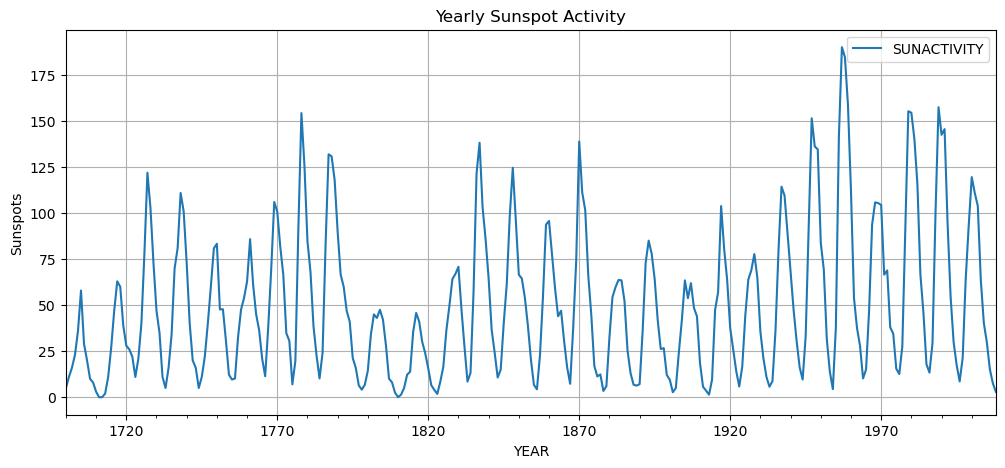

In [4]:
# Plot Sunspot Activity
df.plot(title='Yearly Sunspot Activity', figsize=(12, 5))
plt.ylabel('Sunspots')
plt.grid(True)
plt.show()

In [5]:
# Adfuller Test to Check Stationarity
result = adfuller(df['SUNACTIVITY'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value < 0.05 → data is stationary (you can use AR, MA, or ARMA directly).
# If not → differencing needed → use ARIMA.

ADF Statistic: -2.8377807249381966
p-value: 0.05307642172812041


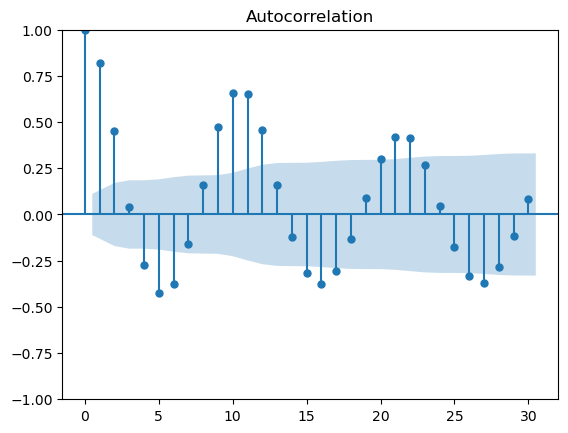

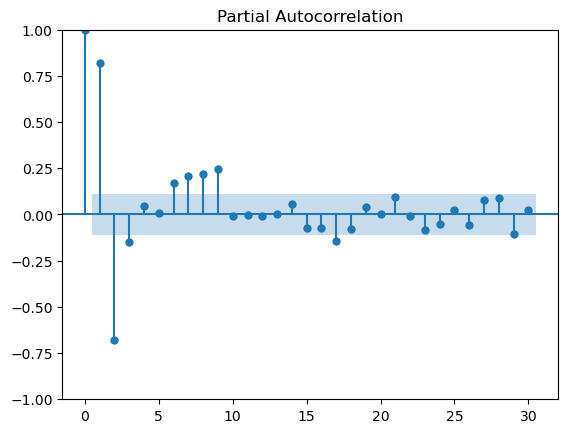

In [6]:
# Plot ACF & PACF 

plot_acf(df['SUNACTIVITY'], lags=30)
plt.show()

plot_pacf(df['SUNACTIVITY'], lags=30)
plt.show()

# Use ACF for q (MA component)
# Use PACF for p (AR component)

In [7]:
# Fit AR Model

model_ar = AutoReg(df['SUNACTIVITY'], lags=2).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     AutoReg(2)   Log Likelihood               -1298.032
Method:               Conditional MLE   S.D. of innovations             16.596
Date:                Wed, 18 Jun 2025   AIC                           2604.064
Time:                        11:07:00   BIC                           2618.971
Sample:                    01-01-1702   HQIC                          2610.025
                         - 01-01-2008                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.9071      1.553      9.600      0.000      11.864      17.951
SUNACTIVITY.L1     1.3918      0.041     33.683      0.000       1.311       1.473
SUNACTIVITY.L2    -0.6903      0.041

In [8]:
# Fit MA Model

model_ma = ARIMA(df['SUNACTIVITY'], order=(0,0,2)).fit()
print(model_ma.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1358.404
Date:                Wed, 18 Jun 2025   AIC                           2724.809
Time:                        11:07:00   BIC                           2739.742
Sample:                    01-01-1700   HQIC                          2730.779
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5110      4.038     12.260      0.000      41.596      57.426
ma.L1          1.1879      0.041     28.649      0.000       1.107       1.269
ma.L2          0.6846      0.041     16.861      0.0

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [9]:
# Fit ARMA Model 

model_arma = ARIMA(df['SUNACTIVITY'], order=(2,0,2)).fit()
print(model_arma.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1304.436
Date:                Wed, 18 Jun 2025   AIC                           2620.873
Time:                        11:07:00   BIC                           2643.273
Sample:                    01-01-1700   HQIC                          2629.828
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7502      3.667     13.567      0.000      42.563      56.938
ar.L1          1.4460      0.077     18.755      0.000       1.295       1.597
ar.L2         -0.7458      0.064    -11.681      0.0

In [10]:
# Fit ARIMA Model 

model_arima = ARIMA(df['SUNACTIVITY'], order=(2,1,2)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1283.163
Date:                Wed, 18 Jun 2025   AIC                           2576.326
Time:                        11:07:00   BIC                           2594.976
Sample:                    01-01-1700   HQIC                          2583.783
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6098      0.026     61.536      0.000       1.559       1.661
ar.L2         -0.9381      0.023    -41.582      0.000      -0.982      -0.894
ma.L1         -1.5185      0.055    -27.634      0.0

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


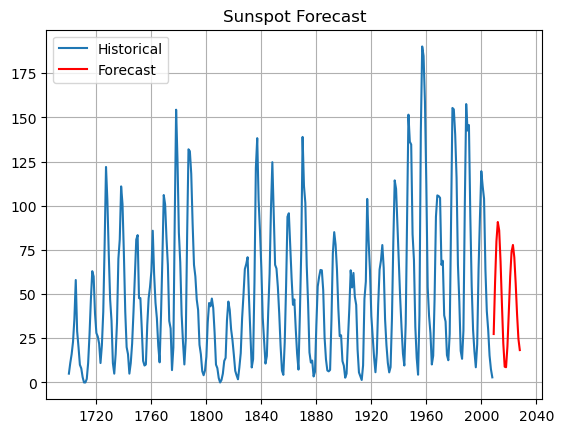

In [11]:
# Forecast Using ARIMA Model

forecast = model_arima.forecast(steps=20)

forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=20, freq='YS')

plt.plot(df.index, df['SUNACTIVITY'], label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Sunspot Forecast')
plt.grid(True)
plt.legend()
plt.show()
